In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [2]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

# Bulgarian Parliament

In [3]:
df_bg = pd.read_csv("ParlaMint-BG-SENT.csv", delimiter = ",", dtype = object)
df_bg["YearMonth"] = df_bg["Date"].str[:-3]

In [4]:
df_bg["Word_total"] = df_bg["Word_total"].astype(float)

In [5]:
mps = df_bg[(df_bg["Speaker_MP"] == "MP") & (df_bg["Speaker_role"] == "Regular")]

In [6]:
df_bg["Word_total"].sum()

26471533.0

In [7]:
df_bg["Word_total"].count()

210017

In [8]:
df_bg["Speaker_name"].nunique()

849

In [9]:
df_bg.columns

Index(['Unnamed: 0', 'ID', 'Sentiment', 'Word_total', 'Score', 'Negscore',
       'Title', 'Date', 'Body', 'Term', 'Session', 'Meeting', 'Sitting',
       'Agenda', 'Subcorpus', 'Speaker_role', 'Speaker_MP', 'Speaker_Minister',
       'Speaker_party', 'Speaker_party_name', 'Party_status', 'Speaker_name',
       'Speaker_gender', 'Speaker_birth', 'Topic_title', 'Meeting_type',
       'Comission', 'YearMonth', 'Government', 'Caretaker', 'Bloc'],
      dtype='object')

In [10]:
pd.unique(df_bg["Speaker_Minister"])

array(['-', 'Minister'], dtype=object)

In [11]:
pd.unique(df_bg["Speaker_role"])

array(['Chairperson', 'Regular'], dtype=object)

#### Speaker

In [12]:
(df_bg["Speaker_role"]== "Chairperson").sum()/len(df_bg)

0.48902231724098527

In [13]:
speaker_words = df_dk[df_bg["Speaker_role"] == "Chairperson"]["Word_total"].astype(float).sum()
total_words = df_bg["Word_total"].astype(float).sum()

NameError: name 'df_dk' is not defined

In [ ]:
print(speaker_words, total_words, speaker_words/total_words)

In [ ]:
#speech length
df_bg[df_bg["Speaker_role"] == "Chairperson"]["Word_total"].astype(float).mean()

In [ ]:
df_bg.groupby(["Speaker_MP", "Speaker_Minister", "Speaker_role"], dropna = False)["Word_total"].sum()/df_bg["Word_total"].sum()

In [14]:
df_bg.groupby(["Speaker_MP", "Speaker_Minister", "Speaker_role"], dropna = False)["Word_total"].count()/df_bg["Word_total"].count()

Speaker_MP  Speaker_Minister  Speaker_role
MP          -                 Chairperson     0.480413
                              Regular         0.455406
notMP       -                 Chairperson     0.008585
                              Regular         0.051186
            Minister          Chairperson     0.000024
                              Regular         0.004385
Name: Word_total, dtype: float64

In [15]:
df_bg.groupby(["Speaker_MP", "Speaker_Minister", "Speaker_role"], dropna = False)["Speaker_name"].nunique()

Speaker_MP  Speaker_Minister  Speaker_role
MP          -                 Chairperson      37
                              Regular         655
notMP       -                 Chairperson      20
                              Regular         240
            Minister          Chairperson       1
                              Regular          21
Name: Speaker_name, dtype: int64

In [16]:
chairpersons = ["Tsacheva Dangovska, Tsetska", "Борисов Главчев, Димитър", "Вълчева Караянчева, Цвета", 
               "Митева Йорданова-Рупчева, Ива", "Георгиев Минчев, Никола", "Николаев Иванов, Мирослав"]

In [17]:
df_bg["Chairperson"] = pd.Series(dtype = bool)

In [18]:
mask = df_bg["Speaker_role"] == "Chairperson"

In [19]:
df_bg["Chairperson"] = df_bg[mask]["Speaker_name"].isin(chairpersons)

In [20]:
df_bg["Chairperson"] = df_bg["Chairperson"].fillna(False)

In [21]:
df_bg.groupby["Chairperson"]

TypeError: 'method' object is not subscriptable

In [22]:
df_bg.groupby(["Speaker_MP", "Speaker_Minister", "Speaker_role"], dropna = False)["Speaker_name"].nunique()/df_bg.groupby(["Speaker_MP", "Speaker_Minister", "Speaker_role"], dropna = False)["Speaker_name"].nunique().sum()

Speaker_MP  Speaker_Minister  Speaker_role
MP          -                 Chairperson     0.037988
                              Regular         0.672485
notMP       -                 Chairperson     0.020534
                              Regular         0.246407
            Minister          Chairperson     0.001027
                              Regular         0.021561
Name: Speaker_name, dtype: float64

In [23]:
df_bg.groupby(["Speaker_MP", "Speaker_Minister", "Speaker_role"], dropna = False)["Speaker_name"].count()/df_bg.groupby(["Speaker_MP", "Speaker_Minister", "Speaker_role"], dropna = False)["Speaker_name"].count().sum()

Speaker_MP  Speaker_Minister  Speaker_role
MP          -                 Chairperson     0.480413
                              Regular         0.455406
notMP       -                 Chairperson     0.008585
                              Regular         0.051186
            Minister          Chairperson     0.000024
                              Regular         0.004385
Name: Speaker_name, dtype: float64

In [24]:
df_bg.groupby(["Speaker_MP", "Speaker_Minister", "Speaker_role"], dropna = False)["Word_total"].sum()/df_bg["Word_total"].sum()

Speaker_MP  Speaker_Minister  Speaker_role
MP          -                 Chairperson     0.134813
                              Regular         0.715139
notMP       -                 Chairperson     0.021381
                              Regular         0.116105
            Minister          Chairperson     0.000043
                              Regular         0.012519
Name: Word_total, dtype: float64

In [25]:
df_bg.groupby(["Speaker_MP", "Speaker_Minister", "Speaker_role"], dropna = False)["Word_total"].mean()

Speaker_MP  Speaker_Minister  Speaker_role
MP          -                 Chairperson      35.370593
                              Regular         197.932248
notMP       -                 Chairperson     313.915141
                              Regular         285.904093
            Minister          Chairperson     226.800000
                              Regular         359.816504
Name: Word_total, dtype: float64

In [26]:
df_bg[df_bg["Speaker_name"] == "Петков Петков, Кирил"].groupby(["Government", "Speaker_Minister", "Speaker_role"])["Speaker_MP"].value_counts()

Government  Speaker_Minister  Speaker_role  Speaker_MP
Petkov      -                 Regular       notMP         131
                                            MP              4
Yanev I     -                 Regular       notMP          35
Yanev II    -                 Regular       MP              5
Name: Speaker_MP, dtype: int64

In [27]:
df_bg.groupby(["Speaker_MP", "Speaker_Minister", "Speaker_role"], dropna = False)["Speaker_name"].nunique()/df_bg.groupby(["Speaker_MP", "Speaker_Minister", "Speaker_role"], dropna = False)["Speaker_name"].nunique().sum()

Speaker_MP  Speaker_Minister  Speaker_role
MP          -                 Chairperson     0.037988
                              Regular         0.672485
notMP       -                 Chairperson     0.020534
                              Regular         0.246407
            Minister          Chairperson     0.001027
                              Regular         0.021561
Name: Speaker_name, dtype: float64

#### Who lacks party status?

The "sympathizers"/supporting parties -- parties of the same bloc as the coalition but not in it. + Greenland and Faroese parties (remove them) 

In [28]:
df_bg[df_bg["Party_status"].isna()]["Speaker_role"].value_counts()

Regular        21474
Chairperson    11130
Name: Speaker_role, dtype: int64

In [29]:
df_bg[df_bg["Party_status"].isna()]["Speaker_party_name"].value_counts()

Парламентарна група: Има такъв народ                                                      5768
Парламентарна група: Български демократичен център - Народен съюз                         2227
Парламентарна група: ГЕРБ-СДС                                                             2189
Парламентарна група: Партия Атака                                                         1621
Парламентарна група: Партия ГЕРБ                                                          1340
Парламентарна група: БСП за България                                                      1023
Парламентарна група: Движение за права и свободи                                           736
Парламентарна група: Изправи се! Мутри вън!                                                725
Парламентарна група: Демократична България                                                 633
Парламентарна група: Изправи_се_БГ!_Ние_идваме!                                            550
Парламентарна група: Продължаваме Промяната       

In [30]:
df_bg[df_bg["Party_status"].isna()]["Speaker_party"].value_counts()

TISP        5768
BDC-NU      2227
GERB-UDF    2189
AP          1621
GERB        1375
BSPFB       1023
MRF          794
RUTO         725
DB           633
RUBGWC       550
WCC          301
BSPLB        198
UP            62
ABV           57
VOLYA         43
RP            38
PF            37
RB            36
Name: Speaker_party, dtype: int64

In [31]:
print(df_bg[df_bg["Party_status"].isna()].groupby("YearMonth")["Speaker_party"].value_counts().to_string())

YearMonth  Speaker_party
2014-10    GERB              292
           BSPLB             113
           AP                 45
           RB                 27
           PF                 23
           MRF                22
           ABV                19
           BDC-NU             15
2014-11    AP                236
           GERB              174
           BSPLB              85
           BDC-NU             40
           ABV                38
           MRF                29
           PF                 14
           RB                  9
2014-12    BDC-NU            107
           AP                 52
2015-01    BDC-NU             82
           AP                 63
2015-02    BDC-NU            147
           AP                129
2015-03    BDC-NU            113
           AP                 73
2015-04    AP                 67
           BDC-NU             55
2015-05    BDC-NU            141
           AP                100
2015-06    AP                 97
           BDC-NU 

In [32]:
print(df_bg.groupby(["YearMonth", "Speaker_party"])["Party_status"].value_counts().to_string())

YearMonth  Speaker_party  Party_status
2014-11    ABV            Coalition         84
           BSPLB          Opposition       380
           GERB           Coalition       1836
           MRF            Opposition       170
           PF             Opposition       133
           RB             Coalition        130
2014-12    ABV            Coalition         45
           BSPLB          Opposition       529
           GERB           Coalition       1968
           MRF            Opposition       161
           PF             Opposition       103
           RB             Coalition        181
2015-01    ABV            Coalition         25
           BSPLB          Opposition       274
           GERB           Coalition       1141
           MRF            Opposition        63
           PF             Opposition        67
           RB             Coalition        110
2015-02    ABV            Coalition         74
           BSPLB          Opposition       682
           GERB      

#### Party status

In [33]:
#remove chaiperson
df_bg = df_bg[df_bg["Speaker_role"]!= "Chairperson"]

In [34]:
#remove non-minister non-MPs
df_bg = df_bg.drop(df_bg[(df_bg["Speaker_Minister"] == "-") & (df_bg["Speaker_MP"] == "notMP")].index)

In [35]:
mps.groupby(["Caretaker", "Party_status"], dropna = False)["Speaker_name"].nunique() / mps.groupby(["Caretaker"], dropna = False)["Speaker_name"].nunique() 

Caretaker  Party_status
False      Coalition       0.595890
           Opposition      0.455479
           NaN             0.080479
True       NaN             1.000000
NaN        Opposition      0.310345
           NaN             0.689655
Name: Speaker_name, dtype: float64

In [36]:
mps.groupby(["Caretaker", "Party_status"], dropna = False)["Word_total"].mean()

Caretaker  Party_status
False      Coalition       209.642752
           Opposition      194.553372
           NaN             203.679251
True       NaN             157.097759
NaN        Opposition      128.912791
           NaN             105.037975
Name: Word_total, dtype: float64

In [37]:
mps.groupby(["Caretaker", "Party_status"], dropna = False)["ID"].count()/mps.groupby(["Caretaker"], dropna = False)["ID"].count()

Caretaker  Party_status
False      Coalition       0.474189
           Opposition      0.487306
           NaN             0.038505
True       NaN             1.000000
NaN        Opposition      0.277569
           NaN             0.722431
Name: ID, dtype: float64

In [38]:
mps.groupby(["Caretaker", "Party_status"], dropna = False)["Word_total"].sum()/mps.groupby(["Caretaker"], dropna = False)["Word_total"].sum()

Caretaker  Party_status
False      Coalition       0.491984
           Opposition      0.469202
           NaN             0.038814
True       NaN             1.000000
NaN        Opposition      0.320442
           NaN             0.679558
Name: Word_total, dtype: float64

In [39]:
mps.groupby(["Caretaker"], dropna = False)["Speaker_name"].nunique().sum()

1000

In [40]:
df_bg.groupby("Party_status", dropna = False)["ID"].count()/len(df_bg)

Party_status
Coalition     0.435773
Opposition    0.453171
NaN           0.111056
Name: ID, dtype: float64

In [41]:
df_bg["Word_total"] = df_bg["Word_total"].astype(float)

In [42]:
df_bg.groupby("Party_status", dropna = False)["Word_total"].sum()/df_bg["Word_total"].sum()

Party_status
Coalition     0.457983
Opposition    0.440229
NaN           0.101789
Name: Word_total, dtype: float64

In [43]:
df_bg.groupby("Party_status", dropna = False)["Word_total"].sum()

Party_status
Coalition     8821767.0
Opposition    8479785.0
NaN           1960673.0
Name: Word_total, dtype: float64

In [44]:
df_bg["Word_total"]

1          810.0
3          533.0
5          919.0
7         1418.0
10          86.0
12           3.0
13          59.0
14           4.0
15        1186.0
17        1075.0
19         167.0
21         151.0
24         241.0
26           3.0
28         292.0
30         787.0
32         157.0
33         929.0
35          78.0
37         153.0
39          80.0
41         128.0
43           3.0
46          64.0
48           1.0
50          68.0
52         131.0
54         116.0
55        1369.0
57          13.0
59          66.0
61         132.0
63          90.0
65          32.0
68          76.0
70          28.0
72          15.0
74          26.0
76          25.0
77        1213.0
79          21.0
81          45.0
83          12.0
85          36.0
87          17.0
90          18.0
93         582.0
95         115.0
99         209.0
101         14.0
105        253.0
107        321.0
111        299.0
113         28.0
115        633.0
118        356.0
120        193.0
124        235.0
127         80

In [45]:
proportions = df_bg.groupby(["Government", "Party_status"], dropna = False)["Word_total"].sum()/df_bg.groupby(["Government"], dropna = False)["Word_total"].sum()

In [46]:
print(proportions)

Government   Party_status
Bliznashki   NaN             1.000000
Borisov II   Coalition       0.494059
             Opposition      0.406332
             NaN             0.099609
Borisov III  Coalition       0.487971
             Opposition      0.475679
             NaN             0.036349
Gerdzhikov   NaN             1.000000
Petkov       Coalition       0.441247
             Opposition      0.553079
             NaN             0.005673
Yanev I      NaN             1.000000
Yanev II     NaN             1.000000
NaN          Opposition      0.320442
             NaN             0.679558
Name: Word_total, dtype: float64


In [47]:
df_bg.groupby(["Government", "Party_status"], dropna = False)["Word_total"].count()/df_bg.groupby(["Government"], dropna = False)["Word_total"].count()

Government   Party_status
Bliznashki   NaN             1.000000
Borisov II   Coalition       0.473562
             Opposition      0.437899
             NaN             0.088539
Borisov III  Coalition       0.461456
             Opposition      0.508052
             NaN             0.030492
Gerdzhikov   NaN             1.000000
Petkov       Coalition       0.485555
             Opposition      0.509139
             NaN             0.005306
Yanev I      NaN             1.000000
Yanev II     NaN             1.000000
NaN          Opposition      0.277569
             NaN             0.722431
Name: Word_total, dtype: float64

### By meeting type

In [48]:
df_bg[df_bg["Meeting_type"] == "ПРОМЕНИ"]["Topic_title"].unique()[:200]

array(['ПРОМЕНИ В СЪСТАВИТЕ НА ВРЕМЕННИ КОМИСИИ,',
       'ПРОМЕНИ В СЪСТАВА НА КОМИСИИ.'], dtype=object)

In [49]:
matches = ["ГЛАСУВАНЕ","ЧЕТЕНЕ|ЗАКОНОПРОЕКТ", "ИЗСЛУШВАНЕ|КОНТРОЛ|НАДЗОР", "ПРОЕКТ|ПРОЕКТИ", "РЕШЕНИЕ|ИЗБОР|ПРОМЕНИ", 
          "ОТЧЕТ"]

In [50]:
percent = []
words = []

for match in matches:
    percent.append(df_bg["Meeting_type"].str.contains(match).value_counts().loc[True]/len(df_bg))
    words.append(df_bg[df_bg["Topic_title"].str.contains(match).fillna(False)]["Word_total"].sum()/df_bg["Word_total"].sum())
    
matches.append("Other")
other = (df_bg["Meeting_type"].str.contains("|".join(matches)).fillna(False).value_counts(dropna = False)/len(df_bg))[False]
other_word = 100 - df_bg[df_bg["Topic_title"].str.contains("|".join(matches)).fillna(False)]["Word_total"].sum()/df_bg["Word_total"].sum()
percent.append(other)
words.append(other)

In [51]:
notype = df_bg[~df_bg["Meeting_type"].str.contains("|".join(matches)).fillna(False)]

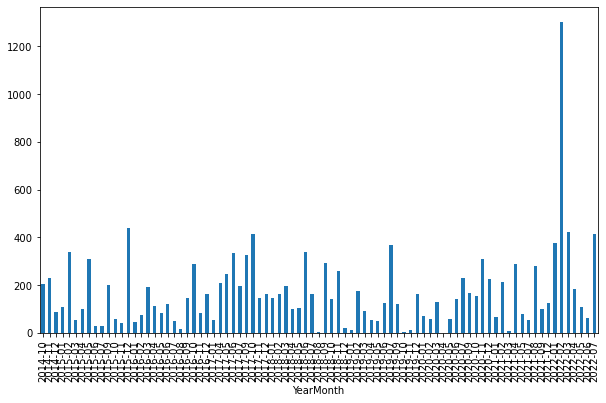

In [52]:
plt.rcParams["figure.figsize"] = (10,6)


notype.groupby(["YearMonth"])["Word_total"].count().plot.bar();

In [53]:
df_bg["Topic_title"].isna().sum()/len(df_bg)

0.12018971873576074

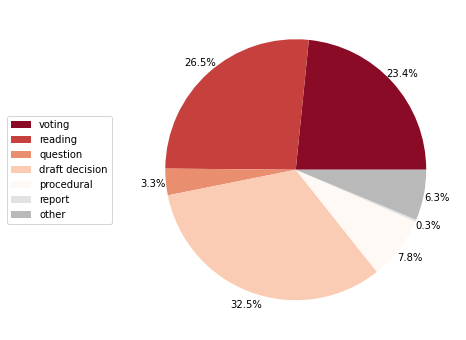

In [60]:
plt.rcParams["figure.figsize"] = (8,6)

labels = ["voting", "reading", "question", "draft decision", "procedural", "report", "other"]
colors = plt.get_cmap("RdGy")(np.linspace(0.05, 0.7, len(labels)))
patches, tags, pers = plt.pie(words, labels=None, autopct='%1.1f%%', pctdistance=1.1, colors = colors)
#plt.title('Words (%) by Type of Meeting in the Bulgarian Parliament', size = 16)

    
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.4, 0.5),
           fontsize=10)
plt.show()

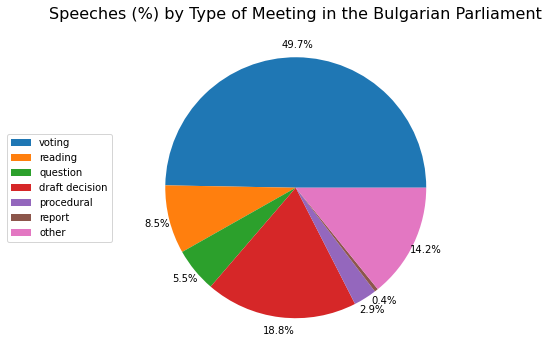

In [53]:
plt.rcParams["figure.figsize"] = (8,6)

patches, tags, pers = plt.pie(percent, labels=None, autopct='%1.1f%%', pctdistance=1.1)
plt.title('Speeches (%) by Type of Meeting in the Bulgarian Parliament', size = 16)
labels = ["voting", "reading", "question", "draft decision", "procedural", "report", "other"]

    
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.4, 0.5),
           fontsize=10)
plt.show()

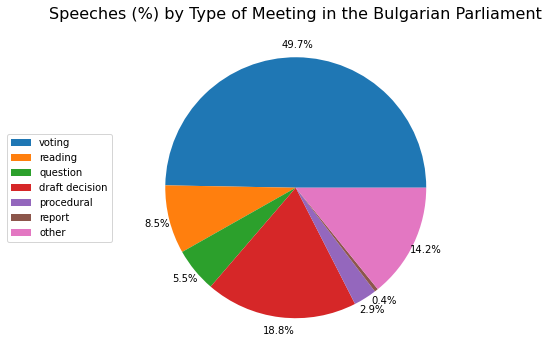

In [54]:
plt.rcParams["figure.figsize"] = (8,6)

patches, tags, pers = plt.pie(percent, labels=None, autopct='%1.1f%%', pctdistance=1.1)
plt.title('Speeches (%) by Type of Meeting in the Bulgarian Parliament', size = 16)
labels = ["voting", "reading", "question", "draft decision", "procedural", "report", "other"]

    
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.4, 0.5),
           fontsize=10)
plt.show()

In [55]:
df_bg[~df_bg["Meeting_type"].str.contains("|".join(matches)).fillna(False)]["Word_total"].count()/len(df_dk)

NameError: name 'df_dk' is not defined

In [56]:
df_bg[~df_bg["Meeting_type"].str.contains("|".join(matches)).fillna(False)]["Word_total"].sum()/df_bg["Word_total"].sum()

0.14762318475669348

In [57]:
df_bg["Meeting_type"].value_counts()

ГЛАСУВАНЕ       50679
ПРОЕКТ          12912
ЗАКОНОПРОЕКТ     5381
ИЗСЛУШВАНЕ       3589
ЧЕТЕНЕ           3264
ИЗБОР            2299
ДОКЛАД           2170
КОНТРОЛ          2019
ПРОЕКТИ           889
РЕШЕНИЕ           473
ОТЧЕТ             452
РАЗИСКВАНИЯ       415
ПРОМЕНИ           153
ОТНОСНО           145
ОСТАВКА           105
ПРЕДСТАВЯНЕ        13
Name: Meeting_type, dtype: int64

In [58]:
matches = ["ГЛАСУВАНЕ","ЧЕТЕНЕ|ЗАКОНОПРОЕКТ", "ИЗСЛУШВАНЕ|КОНТРОЛ", "ПРОЕКТ|ПРОЕКТИ", "РЕШЕНИЕ|ИЗБОР|ПРОМЕНИ", 
          "ОТЧЕТ"]

In [59]:
df_bg["Meeting_few"] = pd.Series(dtype = str)


In [60]:
df_bg[df_bg["Meeting_type"].isin(["ГЛАСУВАНЕ","ЧЕТЕНЕ", "ЗАКОНОПРОЕКТ"])].groupby(["Caretaker", "Party_status"], dropna = False)["Word_total"].count()/df_bg[df_bg["Meeting_type"].isin(["ГЛАСУВАНЕ","ЧЕТЕНЕ", "ЗАКОНОПРОЕКТ"])].groupby(["Caretaker", "Party_status"])["Word_total"].count().sum()

Caretaker  Party_status
False      Coalition       0.533750
           Opposition      0.466250
           NaN             0.037668
True       NaN             0.023974
NaN        Opposition      0.001923
           NaN             0.002570
Name: Word_total, dtype: float64

In [61]:
nochair = df_bg[~((df_bg["Speaker_role"] == "Chairperson") & (df_bg["Speaker_MP"]== "MP"))]

In [62]:
nochair[nochair["Meeting_type"].isin(["ГЛАСУВАНЕ","ЧЕТЕНЕ", "ЗАКОНОПРОЕКТ"])].groupby(["Caretaker", "Party_status"], dropna = False)["Word_total"].count()/nochair[nochair["Meeting_type"].isin(["ГЛАСУВАНЕ","ЧЕТЕНЕ", "ЗАКОНОПРОЕКТ"])].groupby(["Caretaker", "Party_status"])["Word_total"].count().sum()

Caretaker  Party_status
False      Coalition       0.533750
           Opposition      0.466250
           NaN             0.037668
True       NaN             0.023974
NaN        Opposition      0.001923
           NaN             0.002570
Name: Word_total, dtype: float64

#### Reading/Voting

In [63]:
#speeches
mps[mps["Meeting_type"].isin(["ГЛАСУВАНЕ","ЧЕТЕНЕ", "ЗАКОНОПРОЕКТ"])].groupby(["Caretaker", "Party_status"], dropna = False)["Word_total"].count()/mps[mps["Meeting_type"].isin(["ГЛАСУВАНЕ","ЧЕТЕНЕ", "ЗАКОНОПРОЕКТ"])].groupby(["Caretaker", "Party_status"])["Word_total"].count().sum()

Caretaker  Party_status
False      Coalition       0.533750
           Opposition      0.466250
           NaN             0.031432
True       NaN             0.023956
NaN        Opposition      0.001923
           NaN             0.002570
Name: Word_total, dtype: float64

In [64]:
#words
mps[mps["Meeting_type"].isin(["ГЛАСУВАНЕ","ЧЕТЕНЕ", "ЗАКОНОПРОЕКТ"])].groupby(["Caretaker", "Party_status"], dropna = False)["Word_total"].sum()/mps[mps["Meeting_type"].isin(["ГЛАСУВАНЕ","ЧЕТЕНЕ", "ЗАКОНОПРОЕКТ"])].groupby(["Caretaker", "Party_status"])["Word_total"].sum().sum()

Caretaker  Party_status
False      Coalition       0.548350
           Opposition      0.451650
           NaN             0.033266
True       NaN             0.019756
NaN        Opposition      0.001421
           NaN             0.001798
Name: Word_total, dtype: float64

In [65]:
#avg length
mps[mps["Meeting_type"].isin(["ГЛАСУВАНЕ","ЧЕТЕНЕ", "ЗАКОНОПРОЕКТ"])].groupby(["Caretaker", "Party_status"], dropna = False)["Word_total"].mean()

Caretaker  Party_status
False      Coalition       212.408013
           Opposition      200.278484
           NaN             218.814180
True       NaN             170.508627
NaN        Opposition      152.813084
           NaN             144.678322
Name: Word_total, dtype: float64

#### Procedural

In [66]:
mps[mps["Meeting_type"].isin(["ПРОЕКТ", "ПРОЕКТИ", "РЕШЕНИЕ", "ИЗБОР", "ПРОМЕНИ"])].groupby(["Caretaker", "Party_status"], dropna = False)["Word_total"].count()/mps[mps["Meeting_type"].isin(["ПРОЕКТ", "ПРОЕКТИ", "РЕШЕНИЕ", "ИЗБОР", "ПРОМЕНИ"])].groupby(["Caretaker", "Party_status"])["Word_total"].count().sum()

Caretaker  Party_status
False      Coalition       0.439528
           Opposition      0.560472
           NaN             0.064210
True       NaN             0.096352
NaN        Opposition      0.021827
           NaN             0.059052
Name: Word_total, dtype: float64

In [67]:
mps[mps["Meeting_type"].isin(["ПРОЕКТ", "ПРОЕКТИ", "РЕШЕНИЕ", "ИЗБОР", "ПРОМЕНИ"])].groupby(["Caretaker", "Party_status"], dropna = False)["Word_total"].sum()/mps[mps["Meeting_type"].isin(["ПРОЕКТ", "ПРОЕКТИ", "РЕШЕНИЕ", "ИЗБОР", "ПРОМЕНИ"])].groupby(["Caretaker", "Party_status"])["Word_total"].sum().sum()

Caretaker  Party_status
False      Coalition       0.468076
           Opposition      0.531924
           NaN             0.059108
True       NaN             0.052493
NaN        Opposition      0.011401
           NaN             0.027644
Name: Word_total, dtype: float64

In [68]:
mps[mps["Meeting_type"].isin(["ПРОЕКТ", "ПРОЕКТИ", "РЕШЕНИЕ", "ИЗБОР", "ПРОМЕНИ"])].groupby(["Caretaker", "Party_status"], dropna = False)["Word_total"].mean()

Caretaker  Party_status
False      Coalition       207.326361
           Opposition      184.765137
           NaN             179.214203
True       NaN             106.062064
NaN        Opposition      101.691781
           NaN              91.136709
Name: Word_total, dtype: float64

#### Questioning

In [69]:
mps[mps["Meeting_type"].isin(["ИЗСЛУШВАНЕ", "КОНТРОЛ"])].groupby(["Caretaker", "Party_status"], dropna = False)["Word_total"].count()/mps[mps["Meeting_type"].isin(["ИЗСЛУШВАНЕ", "КОНТРОЛ"])].groupby(["Caretaker", "Party_status"])["Word_total"].count().sum()

Caretaker  Party_status
False      Coalition       0.395845
           Opposition      0.604155
           NaN             0.075800
True       NaN             0.397249
NaN        Opposition      0.012072
           NaN             0.032004
Name: Word_total, dtype: float64

In [70]:
mps[mps["Meeting_type"].isin(["ИЗСЛУШВАНЕ", "КОНТРОЛ"])].groupby(["Caretaker", "Party_status"], dropna = False)["Word_total"].sum()/mps[mps["Meeting_type"].isin(["ИЗСЛУШВАНЕ", "КОНТРОЛ"])].groupby(["Caretaker", "Party_status"])["Word_total"].sum().sum()

Caretaker  Party_status
False      Coalition       0.414077
           Opposition      0.585923
           NaN             0.063845
True       NaN             0.371081
NaN        Opposition      0.013922
           NaN             0.020309
Name: Word_total, dtype: float64

In [71]:
mps[mps["Meeting_type"].isin(["ИЗСЛУШВАНЕ", "КОНТРОЛ"])].groupby(["Caretaker", "Party_status"], dropna = False)["Word_total"].mean()

Caretaker  Party_status
False      Coalition       182.080142
           Opposition      168.810409
           NaN             146.611111
True       NaN             162.597173
NaN        Opposition      200.744186
           NaN             110.456140
Name: Word_total, dtype: float64

In [72]:
mps.groupby(["Caretaker", "Meeting_type", "Party_status"], dropna = False)["Word_total"].sum()

Caretaker  Meeting_type  Party_status
False      ГЛАСУВАНЕ     Coalition       5414154.0
                         Opposition      4482511.0
                         NaN              303983.0
           ДОКЛАД        Coalition        338657.0
                         Opposition       299564.0
                         NaN               16155.0
           ЗАКОНОПРОЕКТ  Coalition        563715.0
                         Opposition       439903.0
                         NaN               43203.0
           ИЗБОР         Coalition        165787.0
                         Opposition       172290.0
                         NaN               20076.0
           ИЗСЛУШВАНЕ    Coalition        160775.0
                         Opposition       174550.0
                         NaN               12737.0
           КОНТРОЛ       Coalition         95958.0
                         Opposition       188730.0
                         NaN               26848.0
           ОСТАВКА       Coalition          

In [73]:
print(pd.unique(df_bg[df_bg["Meeting_type"] == "ПРОЕКТИ"]["Topic_title"]))

['ПРОЕКТИ НА РЕШЕНИЯ ЗА ПРОМЕНИ В ПОСТОЯННИ КОМИСИИ.'
 'ПРОЕКТИ НА РЕШЕНИЯ ЗА ПРОМЕНИ В СЪСТАВИТЕ НА ПОСТОЯННИ КОМИСИИ НА НАРОДНОТО СЪБРАНИЕ.'
 'ПРОЕКТИ НА РЕШЕНИЯ ЗА ПОПЪЛВАНЕ СЪСТАВИТЕ НА ПОСТОЯННИ КОМИСИИ.'
 'ПРОЕКТИ НА РЕШЕНИЯ ЗА ПРОМЕНИ В ПОСТОЯННИ КОМИСИИ НА НАРОДНОТО СЪБРАНИЕ.'
 'ПРОЕКТИ ЗА РЕШЕНИЯ ПО ИСКАНИЯТА НА ГЛАВНИЯ ПРОКУРОР НА РЕПУБЛИКА БЪЛГАРИЯ ЗА ДАВАНЕ НА РАЗРЕШЕНИЯ ЗА ВЪЗБУЖДАНЕ НА НАКАЗАТЕЛНИ ПРЕСЛЕДВАНИЯ СРЕЩУ ВОЛЕН НИКОЛОВ СИДЕРОВ, НАРОДЕН ПРЕДСТАВИТЕЛ В 43-ТО НАРОДНО СЪБРАНИЕ.'
 'ПРОЕКТИ ЗА РЕШЕНИЯ ЗА ПОПЪЛВАНЕ СЪСТАВИТЕ НА ПОСТОЯННИ И ВРЕМЕННИ КОМИСИИ.'
 'ПРОЕКТИ ЗА РЕШЕНИЯ ПО ИСКАНИЯТА НА ГЛАВНИЯ ПРОКУРОР НА РЕПУБЛИКА БЪЛГАРИЯ ОТ 26 ОКТОМВРИ 2015 Г. ЗА ДАВАНЕ НА РАЗРЕШЕНИЯ ЗА ВЪЗБУЖДАНЕ НА НАКАЗАТЕЛНИ ПРЕСЛЕДВАНИЯ СРЕЩУ ВОЛЕН НИКОЛОВ СИДЕРОВ И ДЕСИСЛАВ СЛАВОВ ЧУКОЛОВ, НАРОДНИ ПРЕДСТАВИТЕЛИ В 43-ТОТО НАРОДНО СЪБРАНИЕ, И ПРОЕКТИ ЗА РЕШЕНИЯ ПО ИСКАНИЯТА НА ГЛАВНИЯ ПРОКУРОР НА РЕПУБЛИКА БЪЛГАРИЯ ОТ 26 ОКТОМВРИ 2015 Г. ЗА ДАВАНЕ НА РАЗРЕШЕНИЯ ЗА ЗАДЪРЖАНЕТО НА ВОЛЕН 

In [74]:
df_bg["Topic_title"].isna().value_counts()/len(df_bg)

False    0.87981
True     0.12019
Name: Topic_title, dtype: float64

In [75]:
df_bg["Meeting_type"].isna().value_counts()/len(df_bg)

False    0.87981
True     0.12019
Name: Meeting_type, dtype: float64

In [76]:
df_bg[df_bg["Topic_title"].isna()]["Word_total"].sum()/df_bg["Word_total"].sum()

0.10340305961538711

In [77]:
print(df_bg[df_bg["Topic_title"].isna()].groupby(["YearMonth"])["Word_total"].count().to_string())

YearMonth
2014-10     122
2014-11     209
2014-12      74
2015-01     108
2015-02     165
2015-03      43
2015-04      67
2015-05     262
2015-06      31
2015-07      31
2015-09     202
2015-10      58
2015-11      43
2015-12     441
2016-01      45
2016-02      25
2016-03     177
2016-04     113
2016-05      84
2016-06      70
2016-07      17
2016-08      17
2016-09      90
2016-10     288
2016-11      35
2016-12     162
2017-01      48
2017-04     210
2017-05     243
2017-06     274
2017-07     106
2017-09     243
2017-10     156
2017-11     133
2017-12     114
2018-01     148
2018-02     158
2018-03     188
2018-04      70
2018-05      65
2018-06     126
2018-07      19
2018-08       3
2018-09     236
2018-10      87
2018-11     258
2018-12      21
2019-01      13
2019-02     101
2019-03      61
2019-04      28
2019-05      16
2019-06     113
2019-07     321
2019-09      55
2019-10       3
2019-11      11
2019-12      29
2020-01      24
2020-02      60
2020-03     115
2020-04       

In [78]:
df_bg.groupby(["Debate"], dropna = False)["Word_total"].count()/len(df_bg)

KeyError: 'Debate'

#### Debates

In [ ]:
debates = df_bg[df_bg["Meeting_type"].isin(["ГЛАСУВАНЕ", "ЗАКОНОПРОЕКТ", "ЧЕТЕНЕ"])]

In [ ]:
debates["Word_total"].sum()/df_bg["Word_total"].sum()

In [ ]:
debates["Word_total"].count()/df_bg["Word_total"].count()

In [79]:
debates.groupby("Party_status", dropna = False)["Word_total"].count()/len(debates)

NameError: name 'debates' is not defined

In [80]:
debates.groupby("Party_status", dropna = False)["Word_total"].sum()/debates["Word_total"].sum()

NameError: name 'debates' is not defined

#### Questions

In [81]:
questions = df_bg[df_bg["Meeting_type"].isin(["ИЗСЛУШВАНЕ","КОНТРОЛ"])]

In [82]:
questions["Word_total"].sum()/df_bg["Word_total"].sum()

0.05084843521451961

In [83]:
questions["Word_total"].count()/df_bg["Word_total"].count()

0.05807547326125678

In [84]:
questions.groupby("Party_status", dropna = False)["Word_total"].count()/len(questions)

Party_status
Coalition     0.251427
Opposition    0.391405
NaN           0.357168
Name: Word_total, dtype: float64

In [85]:
questions.groupby("Party_status", dropna = False)["Word_total"].sum()/questions["Word_total"].sum()

Party_status
Coalition     0.262118
Opposition    0.379714
NaN           0.358168
Name: Word_total, dtype: float64

#### Draft decisions

In [86]:
drafts = df_bg[df_bg["Meeting_type"].isin(["ПРОЕКТ", "ПРОЕКТИ"])]

In [87]:
drafts["Word_total"].sum()/df_bg["Word_total"].sum()

0.1337115000992876

In [88]:
drafts["Word_total"].count()/df_bg["Word_total"].count()

0.14292075721801084

In [89]:
drafts.groupby("Party_status", dropna = False)["Word_total"].count()/len(drafts)

Party_status
Coalition     0.338888
Opposition    0.471125
NaN           0.189986
Name: Word_total, dtype: float64

In [90]:
drafts.groupby("Party_status", dropna = False)["Word_total"].sum()/drafts["Word_total"].sum()

Party_status
Coalition     0.39739
Opposition    0.46129
NaN           0.14132
Name: Word_total, dtype: float64

#### Other

In [91]:
elsewhere = df_bg[~df_bg["Meeting_type"].isin(["ИЗСЛУШВАНЕ","КОНТРОЛ", "ПРОЕКТ", "ПРОЕКТИ", "ГЛАСУВАНЕ", "ЗАКОНОПРОЕКТ", "ЧЕТЕНЕ"])]

In [92]:
elsewhere.groupby(["Party_status"], dropna = False)["Word_total"].sum()/elsewhere["Word_total"].sum()

Party_status
Coalition     0.360359
Opposition    0.499007
NaN           0.140634
Name: Word_total, dtype: float64

In [93]:
elsewhere.groupby(["Party_status"], dropna = False)["Word_total"].count()/elsewhere["Word_total"].count()

Party_status
Coalition     0.352925
Opposition    0.505412
NaN           0.141663
Name: Word_total, dtype: float64

### Gender

In [111]:
df_bg["Speaker_MP"].unique()

array(['MP', 'notMP'], dtype=object)

In [112]:
mps = df_bg[(df_bg["Speaker_MP"] == "MP") & (df_bg["Speaker_role"] == "Regular")]

In [113]:
mps.groupby(["Bloc", "Speaker_gender"], dropna = False)["Speaker_name"].nunique() / mps.groupby(["Bloc"], dropna = False)["Speaker_name"].nunique()

Bloc   Speaker_gender
Left   F                 0.217593
       M                 0.782407
Right  F                 0.260771
       M                 0.739229
NaN    F                 0.111111
       M                 0.888889
Name: Speaker_name, dtype: float64

In [114]:
mps.groupby(["Bloc", "Speaker_gender"], dropna = False)["Word_total"].sum()/mps.groupby(["Bloc"], dropna = False)["Word_total"].sum()

Bloc   Speaker_gender
Left   F                 0.192341
       M                 0.807659
Right  F                 0.292560
       M                 0.707440
NaN    F                 0.002133
       M                 0.997867
Name: Word_total, dtype: float64

In [115]:
mps.groupby(["Bloc", "Speaker_gender"], dropna = False)["Word_total"].count()/mps.groupby(["Bloc"], dropna = False)["Word_total"].count()

Bloc   Speaker_gender
Left   F                 0.178604
       M                 0.821396
Right  F                 0.278332
       M                 0.721668
NaN    F                 0.005191
       M                 0.994809
Name: Word_total, dtype: float64

In [97]:
mps.groupby(["Bloc", "Speaker_gender"], dropna = False)["Word_total"].mean()

Bloc   Speaker_gender
Left   F                 194.963528
       M                 178.010881
Right  F                 218.194825
       M                 203.491710
NaN    F                  72.750000
       M                 177.647097
Name: Word_total, dtype: float64

In [98]:
mps.groupby(["Bloc", "Speaker_gender"], dropna = False)["Speaker_birth"].describe()

count unique   top  freq
Bloc  Speaker_gender                          
Left  F                5895     28  1969  1353
      M               27111     49  1982  2878
Right F               17005     41  1956  2481
      M               44091     47  1970  4728
NaN   F                   8      3  1961     5
      M                1533     21  1953   600

In [99]:
df_bg["Speaker_birth"] = df_bg["Speaker_birth"].replace("-", np.nan)
df_bg["Speaker_birth"] = df_bg["Speaker_birth"].dropna().astype(int) 

In [100]:
df_bg["Speaker_birth"].mean()

1968.7319237147594

In [101]:
df_bg["Word_total"].mean()

199.47625409055135

In [102]:
mps.groupby("Speaker_gender")["Speaker_name"].count() / len(mps)

Speaker_gender
F    0.239516
M    0.760484
Name: Speaker_name, dtype: float64

In [103]:
mps.groupby("Speaker_gender")["Word_total"].sum() / mps["Word_total"].sum()

Speaker_gender
F    0.25674
M    0.74326
Name: Word_total, dtype: float64

In [104]:
mps = df_bg[df_bg["Speaker_MP"] == "MP"]
ministers = df_bg[df_bg["Speaker_Minister"] == "Minister"]
others = df_bg[(df_bg["Speaker_MP"] != "MP") & (df_bg["Speaker_Minister"] == "Minister")]

In [105]:
mps.groupby(["Speaker_gender"], dropna = False)["Word_total"].sum()/mps["Word_total"].sum()

Speaker_gender
F    0.25674
M    0.74326
Name: Word_total, dtype: float64

In [106]:
mps.groupby(["Speaker_gender"], dropna = False)["Speaker_name"].nunique()/mps["Speaker_name"].nunique()

Speaker_gender
F    0.248855
M    0.751145
Name: Speaker_name, dtype: float64

In [107]:
ministers.groupby(["Speaker_gender"], dropna = False)["Word_total"].sum()/ministers["Word_total"].sum()

Speaker_gender
F    0.097782
M    0.902218
Name: Word_total, dtype: float64

In [108]:
ministers.groupby(["Speaker_gender"], dropna = False)["Speaker_name"].nunique()/ministers["Speaker_name"].nunique()

Speaker_gender
F    0.333333
M    0.666667
Name: Speaker_name, dtype: float64

In [298]:
ministers.groupby(["Government", "Speaker_gender"], dropna = False)["Word_total"].sum()/ministers.groupby(["Government"], dropna = False)["Word_total"].sum()

Government   Speaker_gender
Bliznashki   F                 0.208130
             M                 0.791870
Borisov II   F                 0.235452
             M                 0.764548
Borisov III  F                 0.026469
             M                 0.973531
Gerdzhikov   F                 0.167077
             M                 0.832923
Petkov       F                 0.866649
             M                 0.133351
Yanev I      M                 1.000000
Name: Word_total, dtype: float64

In [299]:
ministers.groupby(["Government", "Speaker_gender"], dropna = False)["Speaker_name"].nunique()/ministers.groupby(["Government"])["Speaker_name"].nunique()

Government   Speaker_gender
Bliznashki   F                 0.285714
             M                 0.714286
Borisov II   F                 0.500000
             M                 0.500000
Borisov III  F                 0.285714
             M                 0.714286
Gerdzhikov   F                 0.250000
             M                 0.750000
Petkov       F                 0.500000
             M                 0.500000
Yanev I      M                 1.000000
Name: Speaker_name, dtype: float64

In [307]:
ministers[ministers["Government"] == "Borisov III"]["Speaker_name"].unique()

array(['Петков, Бисер', 'Порожанов, Румен', 'Любенов Караниколов, Емил',
       'Банов, Боил', 'Василева, Лозана', 'Терзийски, Христо',
       'Петкова Николова, Марияна'], dtype=object)

In [ ]:
people = 

In [293]:
mps.groupby(["Government", "Speaker_gender"], dropna = False)["Word_total"].sum()/mps.groupby(["Government"], dropna = False)["Word_total"].sum()

Government   Speaker_gender
Bliznashki   F                 0.201472
             M                 0.798528
Borisov II   F                 0.241037
             M                 0.758963
Borisov III  F                 0.295382
             M                 0.704618
Gerdzhikov   F                 0.142634
             M                 0.857366
Petkov       F                 0.163800
             M                 0.836200
Yanev I      F                 0.229238
             M                 0.770762
Yanev II     F                 0.141057
             M                 0.858943
Name: Word_total, dtype: float64

In [302]:
mps.groupby(["Government", "Speaker_gender"], dropna = False)["Speaker_name"].nunique()/mps.groupby(["Government"], dropna = False)["Speaker_name"].nunique()

Government   Speaker_gender
Bliznashki   F                 0.180851
             M                 0.819149
Borisov II   F                 0.200820
             M                 0.799180
Borisov III  F                 0.263930
             M                 0.736070
Gerdzhikov   F                 0.231707
             M                 0.768293
Petkov       F                 0.225108
             M                 0.774892
Yanev I      F                 0.234286
             M                 0.765714
Yanev II     F                 0.150000
             M                 0.850000
Name: Speaker_name, dtype: float64

In [300]:
mps.groupby(["Caretaker", "Speaker_gender"], dropna = False)["Word_total"].sum()/mps.groupby(["Caretaker"], dropna = False)["Word_total"].sum()

Caretaker  Speaker_gender
False      F                 0.258683
           M                 0.741317
True       F                 0.212257
           M                 0.787743
Name: Word_total, dtype: float64

In [301]:
mps.groupby(["Caretaker", "Speaker_gender"], dropna = False)["Speaker_name"].nunique()/mps.groupby(["Caretaker"], dropna = False)["Speaker_name"].nunique()

Caretaker  Speaker_gender
False      F                 0.242718
           M                 0.757282
True       F                 0.233333
           M                 0.766667
Name: Speaker_name, dtype: float64

In [289]:
pd.unique(df_bg["Speaker_Minister"])

array(['-', 'Minister'], dtype=object)

In [287]:
pd.unique()

Index(['Unnamed: 0', 'ID', 'Sentiment', 'Word_total', 'Score', 'Title', 'Date',
       'Body', 'Term', 'Session', 'Meeting', 'Sitting', 'Agenda', 'Subcorpus',
       'Speaker_role', 'Speaker_MP', 'Speaker_Minister', 'Speaker_party',
       'Speaker_party_name', 'Party_status', 'Speaker_name', 'Speaker_gender',
       'Speaker_birth', 'Topic_title', 'Meeting_type', 'YearMonth',
       'Government', 'Caretaker', 'Bloc'],
      dtype='object')

In [310]:
with open("ParlaMint-BG.TEI.ana/ParlaMint-BG-listPerson.xml", 'r') as doc:
    file = doc.read()
soup = BeautifulSoup(file, 'xml')

In [342]:
df_bg[df_bg["Government"] == "Petkov"]["Speaker_name"].unique()

array(['Николаев Абровски, Пламен', 'Койчев Иванов, Александър',
       'Страхилов Свиленски, Георги', 'Стефанов Попов, Филип',
       'Стефанова Каназирева, Дани', 'Антонов Каримански, Любомир',
       'Николаев Балачев, Бранимир', 'Ценов Георгиев, Емил',
       'Тодоров Костадинов, Костадин', 'Петев Петков, Деян',
       'Стефанов Стефанов, Васил', 'Руменов Божанков, Явор',
       'Тихомиров Симов, Александър', 'Митева Йорданова-Рупчева, Ива',
       'Вълчева Атанасова, Десислава', 'Петров Чолаков, Радомир',
       'Тодорова Анастасова, Ирена', 'Иванов Чорбанов, Андрей',
       'Ananiev Ananiev, Nastimir', 'Илиев Матеев, Милен',
       'Мирославов Стоилов, Стоил', 'Томов Ганев, Цончо',
       'Кирилов Кирилов, Благовест', 'Николаев Митев, Искрен',
       'Василева Александрова, Анна', 'Николаев Куленски, Петър',
       'Сали Карадайъ, Мустафа', 'Zafirov Zafirov, Atanas',
       'Костадинов Зарков, Крум', 'Калинова Симеонова-Заркин, Цветелина',
       'Георгиев Атанасов, Иво', 'Павлов

In [345]:
ministers.groupby(["Meeting_type"], dropna = False)["Word_total"].count()

Meeting_type
ГЛАСУВАНЕ       263
ДОКЛАД           31
ЗАКОНОПРОЕКТ     70
ИЗБОР             7
ИЗСЛУШВАНЕ      178
КОНТРОЛ          26
ОТНОСНО           6
ПРОЕКТ           83
ПРОЕКТИ          15
ПРОМЕНИ           1
РАЗИСКВАНИЯ      12
РЕШЕНИЕ          12
ЧЕТЕНЕ           15
NaN             202
Name: Word_total, dtype: int64

In [346]:
len(ministers)/len(df_bg)

0.009537715918976016

In [340]:
minlist = ministers[ministers["Government"] == б"Petkov"]["Speaker_name"].unique()
minlist = [" ".join([name.split(",")[1], name.split(",")[0]]) for name in minlist]

In [341]:
for minister in minlist:
    print(minister)

 Христо Терзийски
 Теодора Димитрова Генчовска


In [164]:
#speech length
df_bg.groupby(["Speaker_gender"], dropna = False)["Word_total"].mean()

Speaker_gender
F    202.042029
M    201.498039
Name: Word_total, dtype: float64

### Gender and meeting type

In [165]:
#by meeting type
df_bg.groupby(["Debate", "Speaker_gender"], dropna = False)["Word_total"].sum()/df_bg.groupby(["Debate"], dropna = False)["Word_total"].sum()

Debate  Speaker_gender
False   F                 0.331676
        M                 0.668324
True    F                 0.345647
        M                 0.654353
Name: Word_total, dtype: float64

In [166]:
df_bg.groupby(["Question", "Speaker_gender"], dropna = False)["Word_total"].sum()/df_bg.groupby(["Question"], dropna = False)["Word_total"].sum()

Question  Speaker_gender
False     F                 0.336830
          M                 0.663170
True      F                 0.331617
          M                 0.668383
Name: Word_total, dtype: float64

In [167]:
elsewhere.groupby(["Speaker_gender"], dropna = False)["Word_total"].count()/elsewhere["Word_total"].count()

Speaker_gender
F    0.338583
M    0.661417
Name: Word_total, dtype: float64

### Gender and bloc

In [347]:
mps.groupby(["Bloc", "Speaker_gender"], dropna = False)["Word_total"].sum()/mps.groupby(["Bloc"], dropna = False)["Word_total"].sum()

Bloc   Speaker_gender
Left   F                 0.192341
       M                 0.807659
Right  F                 0.292560
       M                 0.707440
NaN    F                 0.002133
       M                 0.997867
Name: Word_total, dtype: float64

In [349]:
mps.groupby(["Bloc", "Speaker_gender"], dropna = False)["Speaker_name"].nunique()/mps.groupby(["Bloc"], dropna = False)["Speaker_name"].nunique()

Bloc   Speaker_gender
Left   F                 0.217593
       M                 0.782407
Right  F                 0.260771
       M                 0.739229
NaN    F                 0.111111
       M                 0.888889
Name: Speaker_name, dtype: float64

In [348]:
mps["Bloc"].value_counts(dropna = False)

Right    61096
Left     33006
NaN       1541
Name: Bloc, dtype: int64

### Role

In [350]:
df_bg.columns

Index(['Unnamed: 0', 'ID', 'Sentiment', 'Word_total', 'Score', 'Title', 'Date',
       'Body', 'Term', 'Session', 'Meeting', 'Sitting', 'Agenda', 'Subcorpus',
       'Speaker_role', 'Speaker_MP', 'Speaker_Minister', 'Speaker_party',
       'Speaker_party_name', 'Party_status', 'Speaker_name', 'Speaker_gender',
       'Speaker_birth', 'Topic_title', 'Meeting_type', 'YearMonth',
       'Government', 'Caretaker', 'Bloc'],
      dtype='object')

In [351]:
pd.unique(df_bg["Speaker_Minister"])

array(['-', 'Minister'], dtype=object)

In [352]:
df_bg.groupby(["Speaker_Minister"], dropna = False)["Word_total"].sum()/df_bg["Word_total"].sum()

Speaker_Minister
-           0.982796
Minister    0.017204
Name: Word_total, dtype: float64

In [353]:
df_bg.groupby(["Speaker_Minister"], dropna = False)["ID"].count()/len(df_bg)

Speaker_Minister
-           0.990462
Minister    0.009538
Name: ID, dtype: float64

In [354]:
df_bg.groupby(["Speaker_Minister"], dropna = False)["Word_total"].mean()

Speaker_Minister
-           197.932248
Minister    359.816504
Name: Word_total, dtype: float64

### Caretaker

In [235]:
mps.groupby(["Government"])["Word_total"].sum()/mps["Word_total"].sum()

Government
Bliznashki     0.004817
Borisov II     0.337973
Borisov III    0.481561
Gerdzhikov     0.004502
Petkov         0.127651
Yanev I        0.030410
Yanev II       0.002121
Name: Word_total, dtype: float64

In [239]:
mps.groupby(["Caretaker"])["Meeting_type"].value_counts()/mps.groupby(["Caretaker"])["Meeting_type"].count()

Caretaker  Meeting_type
False      ГЛАСУВАНЕ       0.622254
           ПРОЕКТ          0.136557
           ЗАКОНОПРОЕКТ    0.066434
           ЧЕТЕНЕ          0.041326
           ДОКЛАД          0.026012
           ИЗБОР           0.025783
           КОНТРОЛ         0.024829
           ИЗСЛУШВАНЕ      0.023913
           ПРОЕКТИ         0.011066
           ОТЧЕТ           0.005749
           РЕШЕНИЕ         0.005749
           РАЗИСКВАНИЯ     0.005126
           ПРОМЕНИ         0.001933
           ОТНОСНО         0.001768
           ОСТАВКА         0.001336
           ПРЕДСТАВЯНЕ     0.000165
True       ИЗСЛУШВАНЕ      0.332607
           ГЛАСУВАНЕ       0.306463
           ПРОЕКТ          0.244735
           ИЗБОР           0.064149
           ДОКЛАД          0.022755
           ЗАКОНОПРОЕКТ    0.016219
           КОНТРОЛ         0.009925
           РЕШЕНИЕ         0.002179
           ПРОЕКТИ         0.000968
Name: Meeting_type, dtype: float64

In [245]:
(mps["Topic_title"].str.contains("ГЛАСУВАНЕ") & mps["Topic_title"].str.contains("ЗАКОНОПРОЕКТ")).sum()

49709

In [246]:
(mps["Topic_title"].str.contains("ГЛАСУВАНЕ")).sum()

51879

In [247]:
49709 / 51879

0.9581718999980724

In [231]:
mps.groupby(["Caretaker"])["Word_total"].sum()/mps.groupby(["Caretaker"])["Word_total"].sum().sum()

Caretaker
False    0.957687
True     0.042313
Name: Word_total, dtype: float64

In [229]:
mps.groupby(["Caretaker"])["Word_total"].mean()

Caretaker
False    202.059984
True     157.097759
Name: Word_total, dtype: float64

In [234]:
df_bg.groupby(["Caretaker"])["Word_total"].mean()

Caretaker
False    128.462864
True     104.523882
Name: Word_total, dtype: float64

In [232]:
mps.groupby(["Caretaker"])["Word_total"].count()/mps.groupby(["Caretaker"])["Word_total"].count().sum()

Caretaker
False    0.946228
True     0.053772
Name: Word_total, dtype: float64

In [233]:
df_bg.groupby(["Caretaker"])["Word_total"].count()/df_bg.groupby(["Caretaker"])["Word_total"].count().sum()

Caretaker
False    0.939354
True     0.060646
Name: Word_total, dtype: float64

In [228]:
mps.groupby(["Speaker_party", "Speaker_gender"])["Speaker_name"].nunique()/mps.groupby(["Speaker_party"])["Speaker_name"].nunique()

Speaker_party  Speaker_gender
ABV            F                 0.153846
               M                 0.846154
AP             F                 0.272727
               M                 0.727273
BDC-NU         F                 0.071429
               M                 0.928571
BSPFB          F                 0.212963
               M                 0.787037
BSPLB          F                 0.131579
               M                 0.868421
DB             F                 0.323529
               M                 0.676471
GERB           F                 0.339623
               M                 0.660377
GERB-UDF       F                 0.302632
               M                 0.697368
MRF            F                 0.161290
               M                 0.838710
PF             F                 0.105263
               M                 0.894737
RB             F                 0.040000
               M                 0.960000
RP             F                 0.181818
    

In [ ]:
mps.groupby["Speaker_name"]